# Homework 3: Hypothesis Testing
## CMSC320 Fall 2023
### Ariel Monson

#### Dataset

| Variable          |Definition | Key |
| :---------------- | :------: | ----: |
| survival          |   Surivival   | 0 = No, 1 = Yes |
| pclass           |    Ticket class   | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex    |  Sex   | 19.99 |
| age |  Age in years   | 42.99 |
| sibsp |  # of siblings / spouses aboard the Titanic   | 42.99 |
| parch    |  # of parents / children aboard the Titanic   | 19.99 |
| ticket    |  Ticket   | 19.99 |
| fare    |  Passenger Fare   | 19.99 |
| cabin    |  Cabin Number   | 19.99 |
| embarked    |  Port of Embarkation   | C = Cherbourg, Q = Queenstown, S = Southampton |

#### Variable Notes
pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Part 1: Cleaning and Exploration of Data
This part is not graded. Clean and explore data as you see fit.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
data = pd.read_csv("data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Part 2: Guided Research

1. Determine data type (numerical, catagorical, etc) and qualifying conditions for the following hypothesis tests. These will be the hypothesis tests that you will use to complete the rest of the homework.
    - Chi-Squared Test For Independence
    - Z test
    - T Test
    - Mann-Whitney U Test

Answer Here

In [ ]:
'''
1. Chi-Squared Test for Independence: 
    Data Type: Categorical 
    Qualifying Conditions:
        - data in form of contingency table  
        - observations should be counts of occurences 
        - expected freq. in table should be at least 5 
    This test is usually used for hypothesis testing and used to determine 
    whether there is a sig. association between two categorical variables.

2. Z Test: 
    Data Type: Numerical 
    Qualifying Conditions: 
        - pop should be approximately normally distributed
        - pop should have large sample size (n>= 30)
        - know the pop standard deviation or can estimate with sample data 
    This test is usually used when you have a known pop standard deviation and 
    is used to test hypotheses about population means.

3. T Test: 
    Data Type: Numerical 
    Qualifying Conditions: 
        - pop standard deciation is not known (use sample SD to estimate)
        - pop may not be normally dist. 
        - sample should be normally dist. 
        - have two independent groups (independent sample t test)
        - have paired observations (paired sample t test)
    This test is usually used to compare means between two groups, or to test 
    the mean difference within a single group. 

4. Mann-Whitney U Test 
    Data Type: Numerical 
    Qualifying Conditions: 
        - data can be ordinal or continuous 
        - data does not need to follow a normal dist. 
        - sample are independent 
    This test is usually used to compare distributions of two independent 
    samples in order to seeif one tends to have larger values than the other. 


'''

## Part 3: Hypothesis Testing with Two Catagorical Variables
Use $\alpha = 0.01$ for all statistical tests. Essentially, this is the treshold that you compare to the calculated p-value in order to determine statistical significance.

### A. Surviving and Sex (Partial Example)
Notice some of the work is already done for you to get you started.

#### 1. Create Contingency Table
|           | Male | Female |
| :--------: | :--------: | :--------: |
| Survived          |   81   | 233 |
| Did not Survive   |    468  | 109 |

Example code to create contigency table below

In [9]:
# Code to create contigency table is provided below

contingency_table = pd.crosstab(data["Sex"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))
print(contingency_table)

Survived  Not Survived  Survived
Sex                             
female              81       233
male               468       109


#### 2. Create Null and Alternate Hypothesis (Already done as example for this question)

$N_0 = $ Sex and Survival are independent variables

$N_A = $ There's a significant association between sex and survival

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value 
Use Numpy and Scipy, Do NOT manually do calculations

In [10]:
from scipy.stats import chi2_contingency


# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Squared Statistic: 260.71702016732104
P-Value: 1.1973570627755645e-58


#### 4. Interpret Results
Be specific. Determine whether to reject or accept the Null Hypothesis. Was there a group in particular that was more likely to survive the Titanic?

In [ ]:
'''
Because of the low p-value (p < 0.05), we can  reject the null hypothesis($N_0$)
This means that there is enough evidence to suggest that there is a significant 
association between the variables 'Sex' and 'Survival' in the Titanic dataset.

IE: the sex of passengers is not independent of their survival on the Titanic. 

Females were more likely to survive the Titanic disaster compared to males. 
This also does align with the fact that women and children were given priority 
during the evacuation. In summary, we can conclude that there is a significant 
association between sex and survival on the Titanic, and females had a higher 
likelihood of surviving compared to males.

'''

### B. Surviving and Ticket Class
#### 1. Create Contingency Table

In [11]:
contingency_table2 = pd.crosstab(data["Pclass"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))

# Display the contingency table
print(contingency_table2)

Survived  Not Survived  Survived
Pclass                          
1                   80       136
2                   97        87
3                  372       119


#### 2. Create Null and Alternate Hypothesis

In [12]:
'''
$N_0 = $ Ticket Class and Survival are independent variables

$N_A = $ There's a significant association between ticket class and survival
'''

"\n$N_0 = $ Ticket Class and Survival are independent variables\n\n$N_A = $ There's a significant association between ticket class and survival\n"

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value 

In [13]:

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table2)

# Print the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Squared Statistic: 102.88898875696056
P-Value: 4.549251711298793e-23


#### 4. Interpret Results

In [14]:
'''
Because of the low p-value, we reject the null hypothesis ($N_0$). This means 
there is significant association between ticket class and survival on the 
Titanic. In other words, passengers' ticket class was not independent of their 
chances of survival.


Since we have rejected the null hypothesis, it indicates that different ticket 
classes had different survival rates. To determine which class had a higher 
likelihood of survival, we can examine the proportions of survivors in each 
ticket class. Generally, passengers in higher classes (first class) tended 
to have a higher likelihood of survival compared to those in lower classes. 
'''

"\nBecause of the low p-value, we reject the null hypothesis ($N_0$). This means \nthere is significant association between ticket class and survival on the \nTitanic. In other words, passengers' ticket class was not independent of their \nchances of survival.\n\n\nSince we have rejected the null hypothesis, it indicates that different ticket \nclasses had different survival rates. To determine which class had a higher \nlikelihood of survival, we can examine the proportions of survivors in each \nticket class. Generally, passengers in higher classes (first class) tended \nto have a higher likelihood of survival compared to those in lower classes. \n"

### C. Surviving and Embarked Location
#### 1. Create Contingency Table

In [15]:
contingency_table3 = pd.crosstab(data["Embarked"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))

# Display the contingency table
print(contingency_table3)

Survived  Not Survived  Survived
Embarked                        
C                   75        93
Q                   47        30
S                  427       217


#### 2. Create Null and Alternate Hypothesis 

In [16]:
'''
$N_0 = $ Port of Embarkation and Survival are independent variables

$N_A = $ There's a significant association between Port of Embarkation and survival
'''

"\n$N_0 = $ Embarked and Survival are independent variables\n\n$N_A = $ There's a significant association between Embarked and survival\n"

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value

In [17]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table3)

# Print the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Squared Statistic: 26.48914983923762
P-Value: 1.769922284120912e-06


#### 4. Interpret Results 

In [18]:
'''
Because of the low p-value (approximately 0.00000177, less then .05), we can 
reject the null hypothesis. This means there is enough evidence to suggest that 
there is a significant association between the variables 'Embarked' and 
'Survival' in the Titanic dataset.
In other words, the port of embarkation is not independent of survival on the 
Titanic and likely had an impact had an impact on whether passengers survived
or not. 

'''

"\nBecause of the low p-value (approximately 0.00000177, less then .05), we can \nreject the null hypothesis. This means there is enough evidence to suggest that \nthere is a significant association between the variables 'Embarked' and \n'Survival' in the Titanic dataset.\nIn other words, the port of embarkation is not independent of survival on the \nTitanic and likely had an impact had an impact on whether passengers survived\nor not. \n\n"

## Part 4: Hypothesis Testing with Numeric Variables

### A. Surviving and Age (Partial Example)
#### 1. Understand the distribution of the two populations (Normal or Not Normal)

The distributions are plotted for you below in this partial example. As shown by the graphs below, distribution of age for both groups (survived and not survived) is found to be approximately normal.

Hint: Notice that there are missing values for age and you will have to handle this before performing hypothesis tests!

Text(0.5, 1.0, 'Histogram of Age of People who Survived')

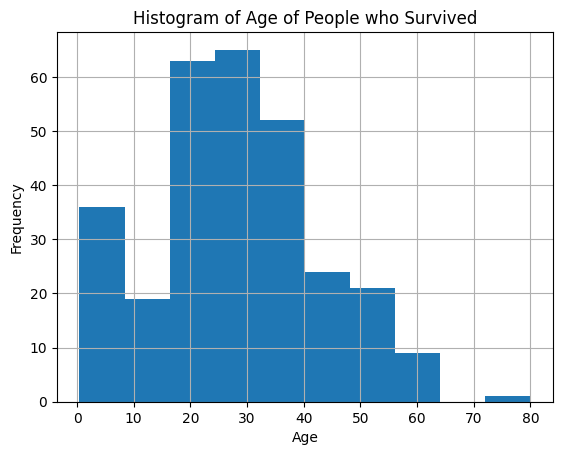

In [32]:
data_cleaned = data.dropna(subset=['Age'])

survived = data_cleaned.loc[data_cleaned["Survived"] == 1]
no_survived = data_cleaned.loc[data_cleaned["Survived"] == 0]


ax = survived["Age"].hist()
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Age of People who Survived")

Text(0.5, 1.0, 'Histogram of Age of People who did not Survived')

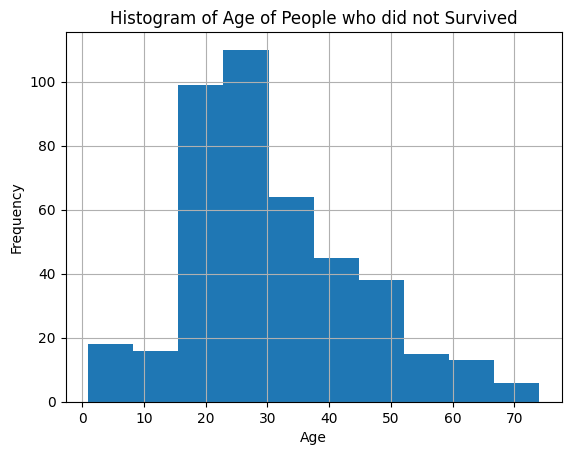

In [33]:
ax = no_survived["Age"].hist()
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Age of People who did not Survived")

#### 2. Create Null and Alternate Hypothesis 

In [ ]:
'''
$N_0 = $ Age and Survival are independent variables

$N_A = $ There's a significant association between Age and survival
'''

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value (Use the fact that the distribution is approximately normal to select your hypothesis test)

In [1]:
from scipy.stats import ttest_ind

survived = data_cleaned.loc[data_cleaned["Survived"] == 1]["Age"]
no_survived = data_cleaned.loc[data_cleaned["Survived"] == 0]["Age"]

survived = survived.dropna()
no_survived = no_survived.dropna()


t_stat, p_value = ttest_ind(survived, no_survived, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

ModuleNotFoundError: No module named 'scipy'

#### 4. Interpret Results

In [ ]:
'''
The t-statistic measures the difference between the means of the 
two groups. In this case, the t-statistic is approximately -2.046, 
meaning that the average age of passengers who survived is lower than the 
average age of passengers who did not survive.

The p-value is the probability of observing a t-statistic as extreme as the 
one calculated, assuming that the null hypothesis is true. In this case, the 
p-value is approximately 0.0412.

Since the p-value is less than .05, we can reject the null hypothesis. 
This means that there is enough evidence to suggest that there is a significant 
difference in the average ages between passengers who survived and passengers 
who did not survive the Titanic disaster. We can conclude that age has a 
significant impact on survival.


'''

### B. Surviving and Fare
#### 1. Understand the distribution of the two populations (Normal or Not Normal)
Plot the distributions like in previous question. Use plots to determine normality.

Text(0.5, 1.0, 'Histogram of Fare of People who Survived')

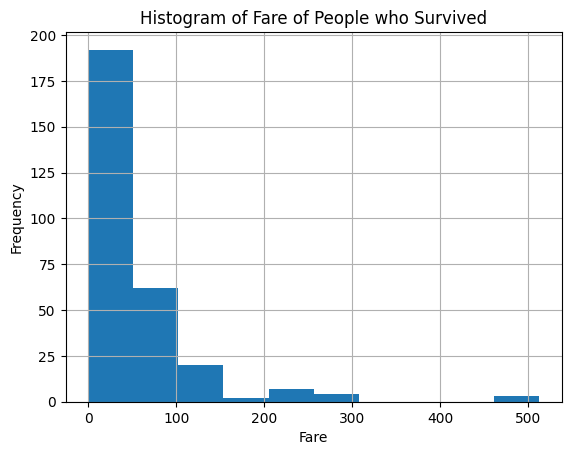

In [36]:

survived = data_cleaned.loc[data_cleaned["Survived"] == 1]
no_survived = data_cleaned.loc[data_cleaned["Survived"] == 0]


ax = survived["Fare"].hist()
ax.set_xlabel("Fare")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Fare of People who Survived")

#### 2. Create Null and Alternate Hypothesis 

Text(0.5, 1.0, 'Histogram of Fare of People who did not Survived')

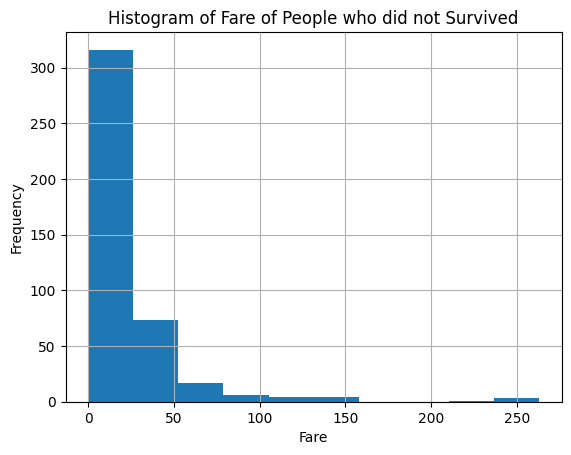

In [37]:
ax = no_survived["Fare"].hist()
ax.set_xlabel("Fare")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Fare of People who did not Survived")

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value (Use characteristics from distribution)

In [38]:

survived = data_cleaned.loc[data_cleaned["Survived"] == 1]["Fare"]
no_survived = data_cleaned.loc[data_cleaned["Survived"] == 0]["Fare"]

survived = survived.dropna()
no_survived = no_survived.dropna()

t_stat, p_value = ttest_ind(survived, no_survived, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 6.547691851114033
P-Value: 1.9646132697636508e-10


#### 4. Interpret Results

In [39]:
'''
The t-statistic measures the difference between the means of the 
two groups. In this case, the t-statistic is approximately 6.55, meaning
that the average fare for passengers who survived is significantly higher than 
the average fare for passengers who did not survive.

The p-value is the probability of observing a t-statistic as extreme as the 
one calculated, assuming that the null hypothesis is true. In this case, the 
p-value is approximately 0.000000000196.

Since the p-value is less than .05, we can reject the null hypothesis. 
This means that there is enough evidence to suggest that there is a significant 
difference in the average fare between passengers who survived and passengers 
who did not survive the Titanic disaster. We can conclude that Fare has a 
significant impact on survival.
'''

'\nThe t-statistic measures the difference between the means of the \ntwo groups. In this case, the t-statistic is approximately 6.55, meaning\nthat the average fare for passengers who survived is significantly higher than \nthe average fare for passengers who did not survive.\n\nThe p-value is the probability of observing a t-statistic as extreme as the \none calculated, assuming that the null hypothesis is true. In this case, the \np-value is approximately 0.000000000196.\n\nSince the p-value is less than .05, we can reject the null hypothesis. \nThis means that there is enough evidence to suggest that there is a significant \ndifference in the average fare between passengers who survived and passengers \nwho did not survive the Titanic disaster. We can conclude that Fare has a \nsignificant impact on survival.\n'